data science end of year project part 3 cats vs dogs 9.8.21

In [1]:
#all the imports that i will need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score  
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
import os
import cv2

in the next 4 cells i will be importing the data from picture form.
<br>when i import the pictures i will be changing the size to 100x100 pixcels and making them gray scale.
<br>because i dont want this done every time i rerun the notebook the next cells will be text because the code has alteady been run. 

In [3]:
# train_dir=r'C:\Users\nechd\Desktop\train1'
# test_dir=r'C:\Users\nechd\Desktop\test1'
# image_size=100

In [4]:
#def label_img(img):
#    word_label=img.split('.')[-3]
#    if word_label=='cat':return [0]
#    elif word_label =='dog':return [1]

In [5]:
#def create_train_data():
#    training_data=[]
#    for img in (os.listdir(train_dir)):
#        label=label_img(img)
#        path=os.path.join(train_dir,img)
#        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
#        training_data.append([img,label])
#    np.save('train_data.npy',training_data)
#    return training_data

In [6]:
# train_data=create_train_data()

in the next 5 cells i will be taking the data and putting into a dataframe format then save it on the computer and reupload it.
<br> because i dont want this done every time i rerun the notebook the next cells will be text because the code has already been run. 

In [7]:
# def create_pic_row(y):
#    df3=pd.DataFrame(train_data[y][0][0])
#    for x in range (1,100):
#        df2=pd.DataFrame(train_data[y][0][x])
#        df3= df3.append(df2)
#    df5=pd.DataFrame(train_data[y][1])
#    df3= df3.append(df5)
#    df3=df3.T
#    return df3

In [8]:
#data=create_pic_row(0)
#for y in range(1,24999):
#    count=y
#    data1=create_pic_row(y) 
#    data=data.append(data1) 
#    print(y)
#data      


In [9]:
#columns=np.arange(0,10001)
#rows=np.arange(0,24999)

In [10]:
#data=data.set_axis(columns, axis='columns')
#data=data.set_index(rows)

In [11]:
#data.to_csv('cats_vs_dogs_train.csv')

In [12]:
#importing the train data frame that is saved to my computer
training_set=pd.read_csv(r"C:\Users\nechd\Desktop\cats_vs_dogs_train.csv")

In [13]:
training_set=training_set.drop(['Unnamed: 0'], axis=1)
training_set

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


In [14]:
#splitting the data
# i need to split it into 3 parts 
train_set, test_set1 = train_test_split(training_set, test_size=0.3, random_state=42)
test_set, test_set_dont_touch=train_test_split(test_set1, test_size=0.5, random_state=42)

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17499 entries, 4913 to 23654
Columns: 10001 entries, 0 to 10000
dtypes: int64(10001)
memory usage: 1.3 GB


In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 23922 to 24214
Columns: 10001 entries, 0 to 10000
dtypes: int64(10001)
memory usage: 286.2 MB


In [17]:
test_set_dont_touch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 17149 to 8198
Columns: 10001 entries, 0 to 10000
dtypes: int64(10001)
memory usage: 286.2 MB


In [18]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
4913,28,39,55,74,26,15,21,19,9,18,...,203,207,206,205,205,206,199,194,192,0
9338,237,241,239,240,242,238,237,236,233,237,...,168,158,159,118,127,147,141,145,175,0
24210,205,188,163,135,123,140,137,124,111,100,...,171,168,169,166,156,138,115,100,90,1
18790,85,87,84,81,83,84,87,89,91,92,...,70,43,28,82,40,34,75,87,52,1
16066,134,131,132,133,128,122,123,117,109,112,...,78,114,102,85,140,123,122,108,107,1


In [19]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
23922,142,160,141,146,162,159,167,168,169,168,...,21,21,20,18,20,19,21,23,23,1
3852,28,24,29,25,27,29,29,24,27,24,...,29,28,27,27,31,29,32,26,29,0
16283,213,225,223,220,235,230,243,209,241,229,...,255,248,241,198,240,231,224,225,221,1
4271,110,98,126,129,127,131,124,132,166,158,...,227,215,231,220,221,220,215,225,225,0
11337,216,209,198,215,204,175,214,221,216,202,...,150,111,112,123,125,141,150,147,208,0


In [62]:
test_set_dont_touch.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [20]:
# changing the data type and spliiting into x,y
train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')
test_set_dont_touch=np.array(test_set,dtype='float32')

x_train_set=train_set[ : , 0:10000]
y_train_set=train_set[ : , 10000]
x_test_set=test_set[ : , 0:10000]
y_test_set=test_set[ : , 10000]
x_test_set_dont_touch=test_set_dont_touch[ : , 0:10000]
y_test_set_dont_touch=test_set_dont_touch[ : , 10000]

In [21]:
x_train_set

array([[ 28.,  39.,  55., ..., 199., 194., 192.],
       [237., 241., 239., ..., 141., 145., 175.],
       [205., 188., 163., ..., 115., 100.,  90.],
       ...,
       [ 65.,  71.,  67., ...,  40.,  41.,  31.],
       [142., 164., 128., ..., 114., 119., 157.],
       [111.,  73.,  60., ...,  18.,  22.,  19.]], dtype=float32)

In [22]:
y_train_set

array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [23]:
x_test_set

array([[142., 160., 141., ...,  21.,  23.,  23.],
       [ 28.,  24.,  29., ...,  32.,  26.,  29.],
       [213., 225., 223., ..., 224., 225., 221.],
       ...,
       [129., 136.,  93., ..., 139., 153., 134.],
       [ 68.,  67.,  81., ...,  37.,  35.,  37.],
       [ 80.,  85.,  91., ...,  65.,  66.,  69.]], dtype=float32)

In [24]:
y_test_set

array([1., 0., 1., ..., 1., 0., 1.], dtype=float32)

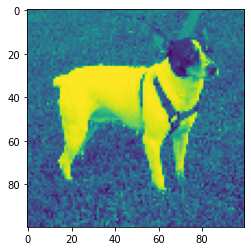

In [68]:
image1=x_train_set[7, :].reshape((100,100))
plt.imshow(image1)

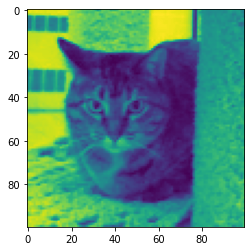

In [63]:
image1=x_train_set[1, :].reshape((100,100))
plt.imshow(image1)

In [27]:
# function to represent the confussion matrix nicely

def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')  

In [28]:
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_test_reduced1=pca1.transform(x_test_set)

In [29]:
pca1.n_components_

331

In [70]:
arr=np.arange(5,60,5)
arr

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [ ]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced1, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced1)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.5984


In [30]:
knn1 = KNeighborsClassifier(n_neighbors=27)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.6269333333333333

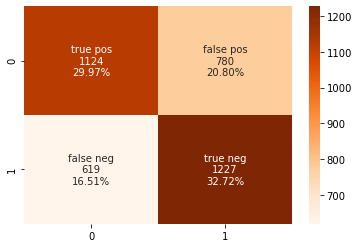

In [31]:
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
confussion_matrix(mat_knn1)

In [32]:
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1)) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1))

precision_score_knn: 0.6113602391629297
recall_score_knn: 0.6646803900325027
f1_score_knn: 0.6369063067739423


In [33]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.60142857 0.60057143 0.606      0.61742857 0.60045727] mean: 0.6051771689870575


In [34]:
XG1=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.652

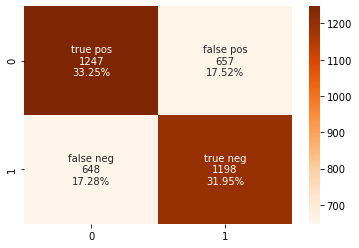

In [35]:
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
confussion_matrix(mat_XG1)

In [36]:
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1)) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1))

precision_score_XG1: 0.645822102425876
recall_score_XG1: 0.6489707475622969
f1_score_XG1: 0.6473925965955147


In [37]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.63028571 0.63542857 0.61771429 0.63628571 0.64675622] mean: 0.6332941003552035


In [38]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_train_recovered2=pca2.inverse_transform(x_train_reduced2)
x_test_reduced2=pca2.transform(x_test_set)
x_test_recovered2=pca2.inverse_transform(x_test_reduced2)

In [39]:
pca2.n_components_

72

In [40]:
knn2 = KNeighborsClassifier(n_neighbors=16)
knn2.fit(x_train_recovered2, y_train_set)
y_pred_knn2=knn2.predict(x_test_recovered2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.6218666666666667

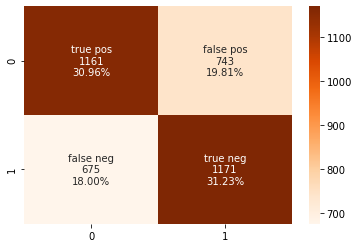

In [41]:
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
confussion_matrix(mat_knn2)

In [42]:
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2)) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2))

precision_score_knn2: 0.6118077324973876
recall_score_knn2: 0.6343445287107259
f1_score_knn2: 0.622872340425532


In [43]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.61114286 0.60428571 0.59685714 0.60628571 0.59531295] mean: 0.6027768750255176


In [44]:
XG2=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.6256

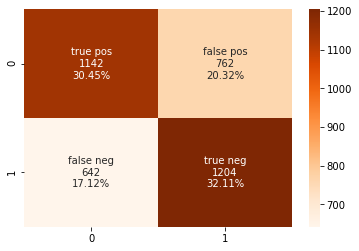

In [45]:
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
confussion_matrix(mat_XG2)

In [46]:
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2)) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2))

precision_score_XG2: 0.612410986775178
recall_score_XG2: 0.6522210184182016
f1_score_XG2: 0.6316894018887722


In [47]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.63942857 0.63057143 0.62142857 0.62742857 0.62103458] mean: 0.6279783448332176


In [48]:
pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_train_recovered3=pca3.inverse_transform(x_train_reduced3)
x_test_reduced3=pca3.transform(x_test_set)
x_test_recovered3=pca3.inverse_transform(x_test_reduced3)

In [49]:
pca3.n_components_

25

In [69]:
arr=np.arange(5,60,5)
arr

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [51]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.5954666666666667
10 0.6197333333333334
15 0.6173333333333333
20 0.6298666666666667
25 0.6178666666666667
30 0.6264
35 0.6229333333333333
40 0.6232
45 0.6176
50 0.6264
55 0.6189333333333333
60 0.624
65 0.6130666666666666
70 0.6176
75 0.612
80 0.6168
85 0.6085333333333334
90 0.6125333333333334
95 0.6061333333333333
100 0.6112
105 0.6074666666666667
110 0.6085333333333334
115 0.6061333333333333
120 0.6072
125 0.6058666666666667
130 0.6069333333333333
135 0.6042666666666666
140 0.6066666666666667
145 0.6024
150 0.6058666666666667
155 0.6016
160 0.6050666666666666
165 0.5981333333333333
170 0.5986666666666667
175 0.6018666666666667
180 0.6026666666666667
185 0.5973333333333334
190 0.6013333333333334
195 0.5954666666666667
200 0.5986666666666667
205 0.5970666666666666
210 0.5954666666666667
215 0.5930666666666666
220 0.5933333333333334
225 0.5957333333333333
230 0.5944
235 0.5962666666666666
240 0.5981333333333333
245 0.5936
250 0.5944
255 0.5933333333333334
260 0.596
265 0.5896
270 0.59

In [61]:
for x in range(10,30):
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )  

10 0.6197333333333334
11 0.6106666666666667
12 0.6234666666666666
13 0.6130666666666666
14 0.6237333333333334
15 0.6173333333333333
16 0.6253333333333333
17 0.6242666666666666
18 0.6314666666666666
19 0.6232
20 0.6298666666666667
21 0.6189333333333333
22 0.6245333333333334
23 0.6178666666666667
24 0.6208
25 0.6178666666666667
26 0.6245333333333334
27 0.6186666666666667
28 0.6232
29 0.6170666666666667


In [53]:
knn3 = KNeighborsClassifier(n_neighbors=16)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.6253333333333333

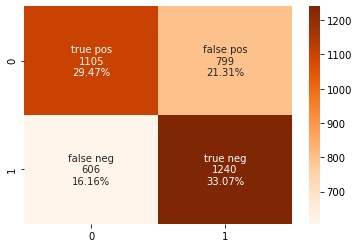

In [54]:
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
confussion_matrix(mat_knn3)

In [55]:
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3)) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3))

precision_score_knn3: 0.6081412457086808
recall_score_knn3: 0.6717226435536294
f1_score_knn3: 0.6383526383526383


In [56]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.602      0.60228571 0.61371429 0.616      0.59502715] mean: 0.6058054301228923


In [57]:
XG3=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_recovered3, y_train_set)
y_pred_XG3=XG3.predict(x_test_recovered3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.6330666666666667

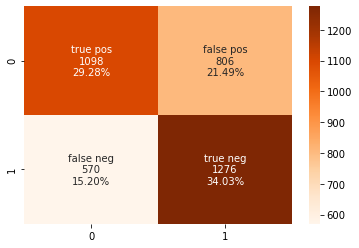

In [58]:
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
confussion_matrix(mat_XG3)

In [59]:
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3)) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3))

precision_score_XG3: 0.6128722382324687
recall_score_XG3: 0.6912242686890574
f1_score_XG3: 0.6496945010183299


In [60]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.62685714 0.62714286 0.62114286 0.63457143 0.62103458] mean: 0.6261497734046462
